In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import io

In [ ]:
타이타닉 데이터 세팅

In [5]:
df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [35]:
feature_names=["pclass","age"]
dfX=df[feature_names].copy()
dfy=df["survived"].copy()
dfX.tail()

,pclass,age
886,2,27.0
887,1,19.0
888,3,NaN
889,1,26.0
890,3,32.0


In [36]:
dfX["age"].fillna(dfX["age"].mean(),inplace=True)
dfX.tail()

,pclass,age
886,2,27.000000
887,1,19.000000
888,3,29.699118
889,1,26.000000
890,3,32.000000


In [37]:
from sklearn.model_selection import  train_test_split
from sklearn.tree import  DecisionTreeClassifier

In [38]:
from sklearn.tree import  export_graphviz
import pydot
from IPython.core.display import Image
X_train, X_test, y_train, y_test=train_test_split(dfX,dfy,test_size=0.25, random_state=0)

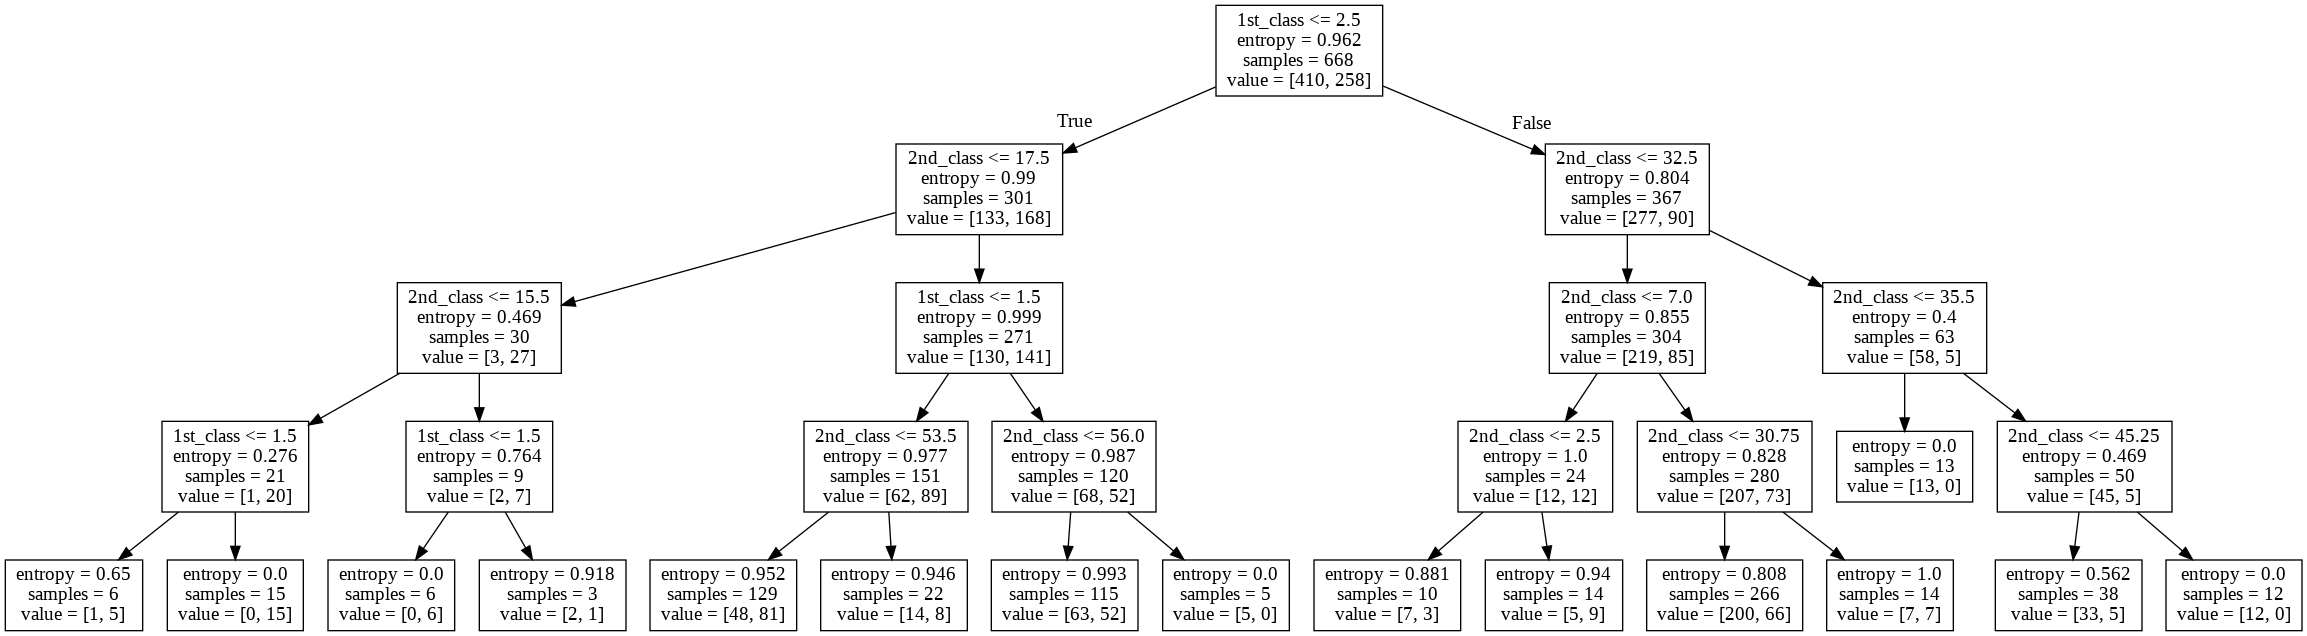

In [49]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=4, min_samples_leaf=2).fit(X_train, y_train)
command_bf=io.StringIO()
export_graphviz(model,out_file=command_bf,feature_names=['1st_class','2nd_class'])
gp=pydot.graph_from_dot_data(command_bf.getvalue())[0]
image=gp.create_png()
Image(image)